# Librerias

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Cargamos datos

In [2]:
df = pd.read_csv('../01_data/train_sin_nulos.csv', index_col = 0)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


# Identificamos outliers en las variables numéricas

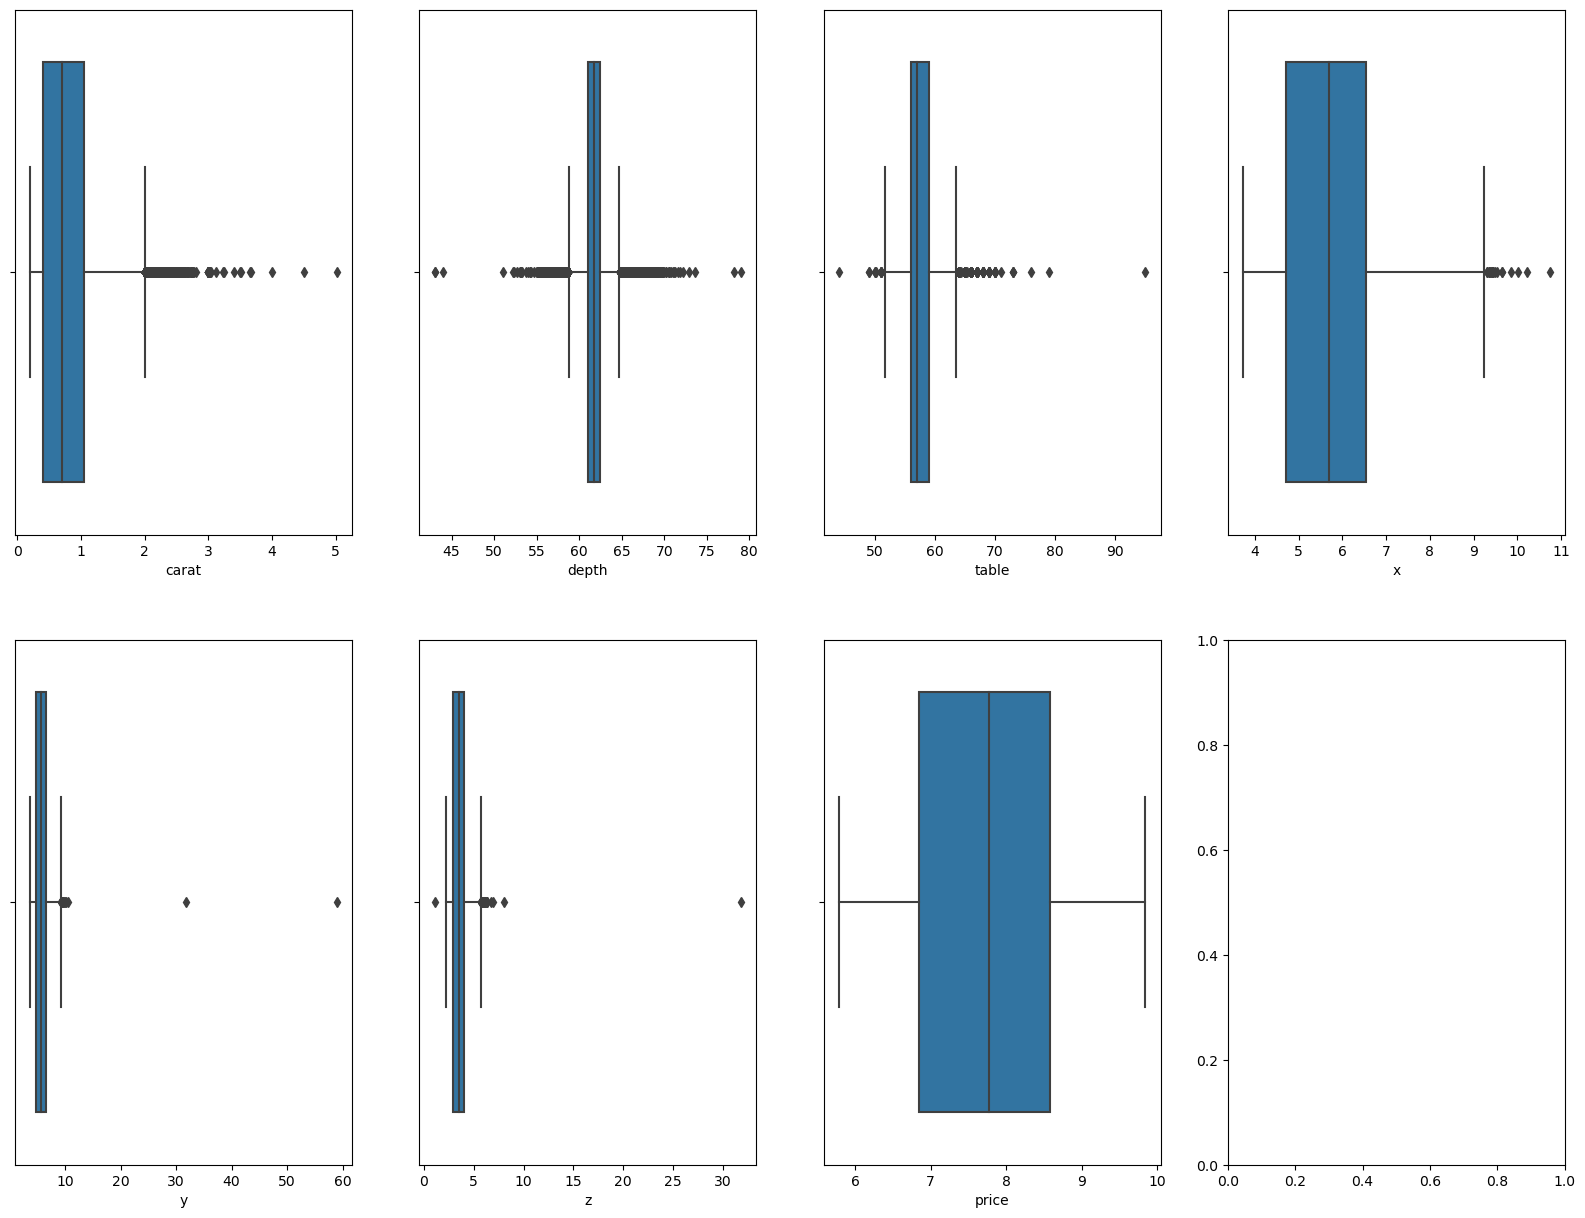

In [3]:
# seleccionamos solo aquellas variables numéricas

df_numericas = df.select_dtypes(include=np.number)

fig, axes = plt.subplots(2, 4, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas.columns):
    sns.boxplot(x=columna, data=df_numericas, ax=axes[indice])

plt.show()

Vemos que la unica variable númerica sin outliers es la del precio, la variable respuesta.

Una vez detectados de manera visual, hacemos un diccionario con los outliers de cada columna:

In [4]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices

In [5]:
lista_columnas = df_numericas.columns
lista_columnas

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [6]:
# aplicamos la función y sacamos los índices de los outliers.

ind = detectar_outliers(lista_columnas, df)
print(ind)

{'carat': [40, 85, 130, 173, 244, 264, 274, 289, 292, 295, 312, 346, 398, 574, 587, 662, 681, 682, 716, 725, 728, 782, 785, 798, 799, 801, 818, 928, 973, 993, 995, 1011, 1025, 1026, 1051, 1154, 1216, 1315, 1388, 1402, 1417, 1418, 1423, 1429, 1433, 1437, 1443, 1522, 1660, 1670, 1739, 1814, 1816, 1866, 1885, 1894, 1967, 1971, 1977, 1995, 2030, 2052, 2063, 2071, 2178, 2194, 2224, 2229, 2238, 2257, 2289, 2340, 2346, 2352, 2357, 2410, 2440, 2449, 2460, 2465, 2468, 2496, 2518, 2529, 2530, 2556, 2570, 2664, 2683, 2767, 2785, 2799, 2811, 2884, 2912, 2935, 2939, 2971, 2981, 3018, 3032, 3073, 3123, 3140, 3146, 3149, 3156, 3237, 3297, 3316, 3348, 3351, 3369, 3378, 3381, 3403, 3430, 3481, 3488, 3491, 3502, 3525, 3545, 3558, 3580, 3593, 3606, 3658, 3666, 3667, 3675, 3699, 3747, 3780, 3790, 3820, 3828, 3837, 3844, 3908, 4084, 4124, 4147, 4192, 4215, 4276, 4285, 4327, 4342, 4356, 4384, 4406, 4411, 4442, 4522, 4594, 4621, 4634, 4649, 4651, 4673, 4674, 4679, 4703, 4721, 4730, 4790, 4824, 4829, 4847, 49

In [7]:
# Veamos el nº de outliers de cada valor
for columna, outliers in ind.items():
    num_outliers = len(outliers)
    print(f"La columna '{columna}' tiene {num_outliers} outliers.")

La columna 'carat' tiene 1435 outliers.
La columna 'depth' tiene 1896 outliers.
La columna 'table' tiene 448 outliers.
La columna 'x' tiene 19 outliers.
La columna 'y' tiene 17 outliers.
La columna 'z' tiene 26 outliers.


# Sustituimos todos los outliers numéricos por la media

In [8]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función 
for k, v in ind.items():
    media = df[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df.loc[i,k] = media # usando el loc, reemmplazamos los valores de los outliers por la media que hemos calculado al inicio.  

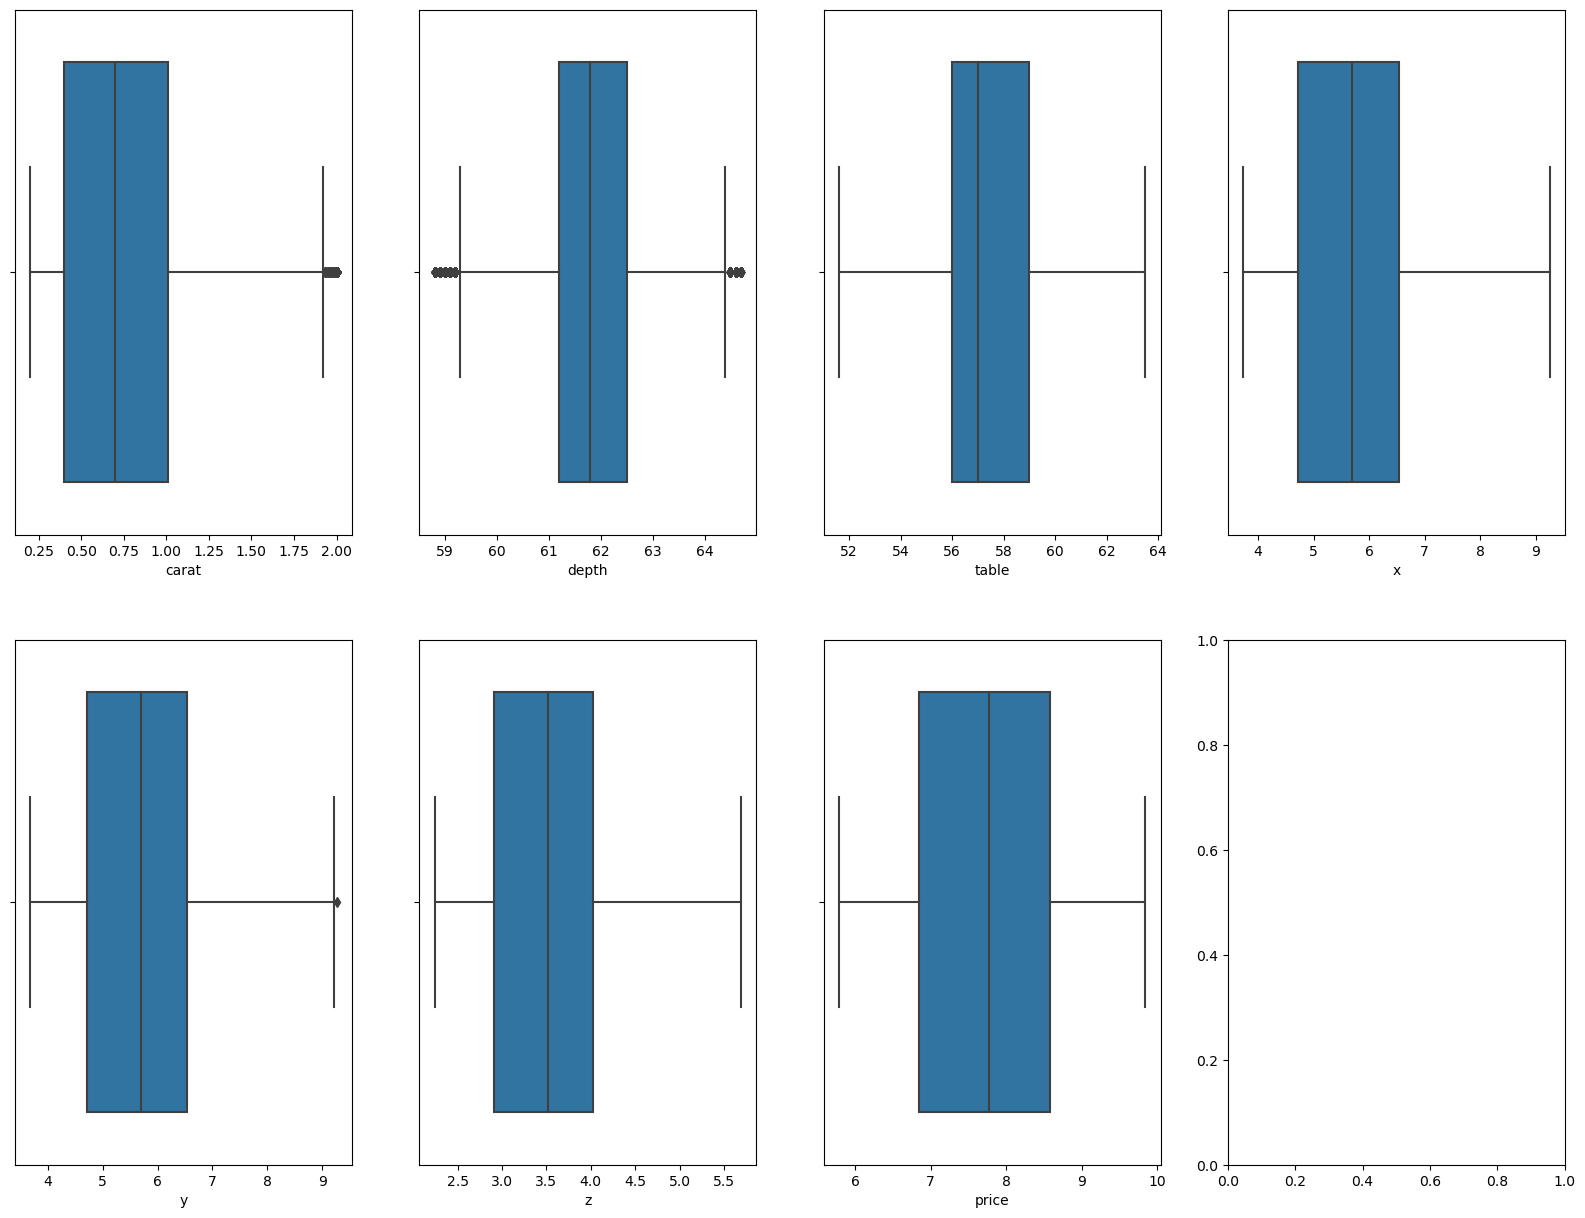

In [10]:
df_numericas2 = df.select_dtypes(include = np.number)

fig, axes = plt.subplots(2, 4, figsize=(20,15))
axes = axes.flat

for indice, columna in enumerate(df_numericas2.columns):
    sns.boxplot(x=columna, data=df_numericas2, ax=axes[indice])
plt.show()

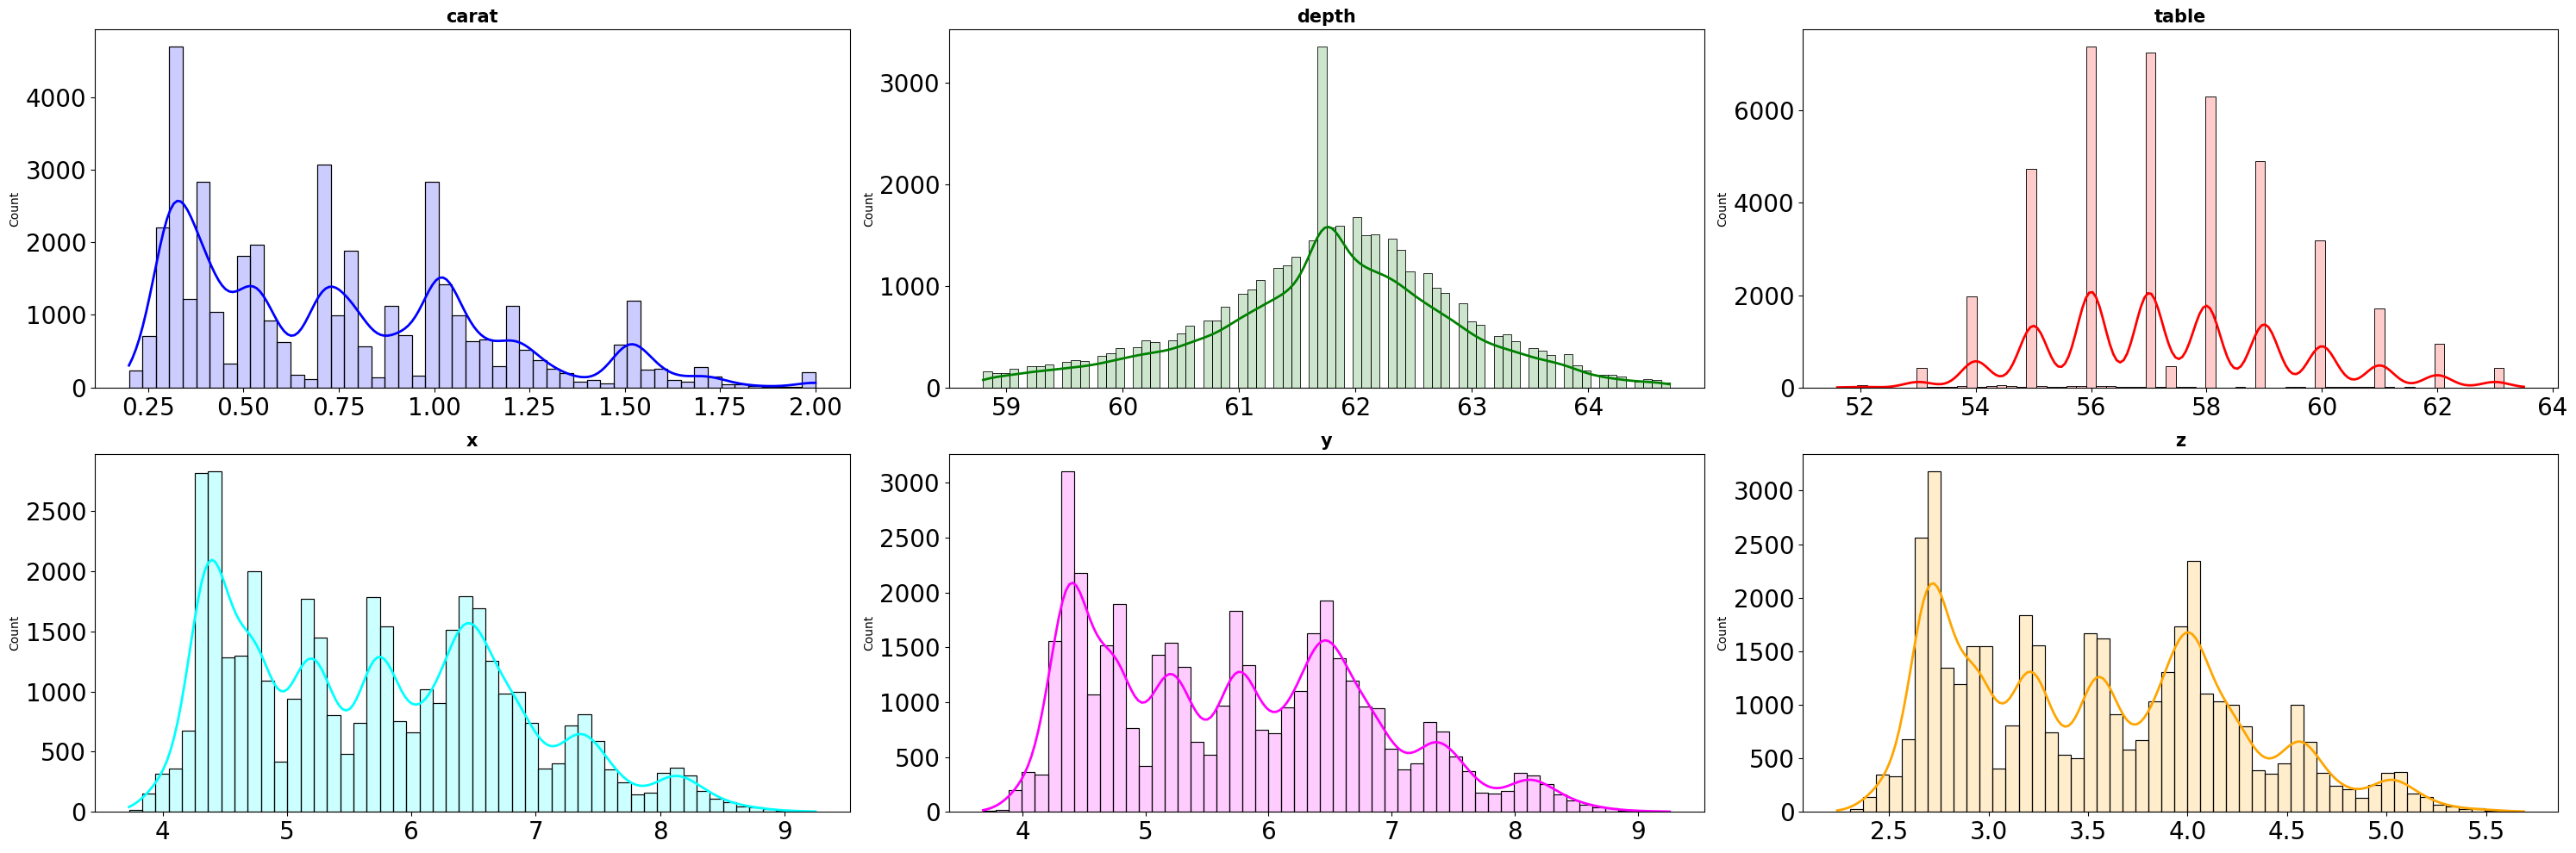

In [11]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

lista_colores = ["blue", "green", "red", "cyan", "magenta", "orange"]

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop("price")

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = lista_colores[i], 
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout()

In [12]:
# guardamos el csv con los valores cambiados

df.to_csv("../01_data/train_nonull_nooutliers.csv")

In [13]:
# Me faltan los outliers de las categóricas.